Name - Onkar Katkamwar

PRN - 202201040098

Batch - T(2) (Computer Enggineering)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Load the dataset
ipo_data = pd.read_csv('/content/sample_data/cleaned_ipo_data.csv')


In [ ]:
# Display the first 5 rows
print(ipo_data.head())

         Date         IPO_Name  Issue_Size(crores)    QIB     HNI    RII  \
0  2019-05-08           Neogen              131.48  30.49  113.88  16.06   
1  2022-02-16  Vedant Fashions             3149.00   7.49    1.07   0.39   
2  2022-02-08     Adani Wilmar             3600.00   5.73   56.30   3.92   
3  2017-07-25  Salasar Techno                35.87   0.00  487.18  58.59   
4  2022-01-31     AGS Transact              716.87   2.68   25.61   3.08   

   Issue_price  Listing_Open  Listing_Close  Listing_Gain     CMP  \
0          100        251.00         263.55    151.000000  278.00   
1          866        950.00         934.85      9.699769  906.75   
2          230        274.00         265.20     19.130435  354.35   
3          108        259.45         272.10    140.231482  215.75   
4          175        176.00         161.30      0.571429  125.10   

  Market_Profit  SME  
0           Yes  Yes  
1           Yes   No  
2           Yes   No  
3           Yes   No  
4            

In [ ]:
print(ipo_data.isnull().sum())

Date                  0
IPO_Name              0
Issue_Size(crores)    0
QIB                   0
HNI                   0
RII                   0
Issue_price           0
Listing_Open          0
Listing_Close         0
Listing_Gain          0
CMP                   0
Market_Profit         0
SME                   0
dtype: int64


In [ ]:
# Step 1: Create Target Variable 'Pricing_Status'
ipo_data['Pricing_Status'] = ipo_data['Listing_Gain'].apply(lambda x: 'Underpriced' if x > 0 else 'Overpriced')

# Step 2: Encode categorical variables
ipo_data['Market_Profit'] = ipo_data['Market_Profit'].map({'Yes': 1, 'No': 0})
ipo_data['SME'] = ipo_data['SME'].map({'Yes': 1, 'No': 0})

In [ ]:
# Display the first 5 rows after encoding
print("\nEncoded Data (First 5 Rows):")
print(ipo_data.head())


Encoded Data (First 5 Rows):
         Date         IPO_Name  Issue_Size(crores)    QIB     HNI    RII  \
0  2019-05-08           Neogen              131.48  30.49  113.88  16.06   
1  2022-02-16  Vedant Fashions             3149.00   7.49    1.07   0.39   
2  2022-02-08     Adani Wilmar             3600.00   5.73   56.30   3.92   
3  2017-07-25  Salasar Techno                35.87   0.00  487.18  58.59   
4  2022-01-31     AGS Transact              716.87   2.68   25.61   3.08   

   Issue_price  Listing_Open  Listing_Close  Listing_Gain     CMP  \
0          100        251.00         263.55    151.000000  278.00   
1          866        950.00         934.85      9.699769  906.75   
2          230        274.00         265.20     19.130435  354.35   
3          108        259.45         272.10    140.231482  215.75   
4          175        176.00         161.30      0.571429  125.10   

   Market_Profit  SME Pricing_Status  
0            1.0    1    Underpriced  
1            1.0    

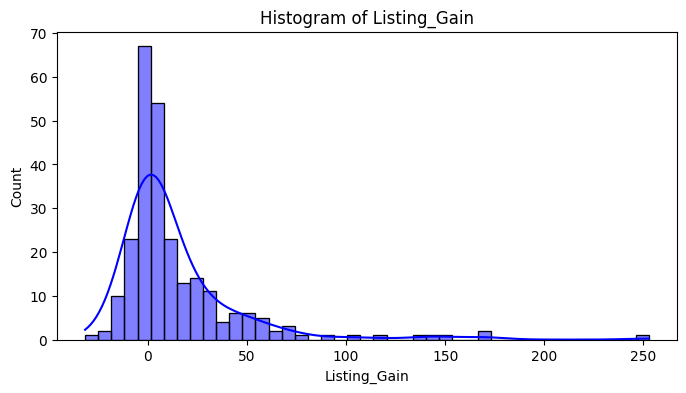

<ipython-input-10-becd0f92b319>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ipo_data[col], shade=True, color='green')


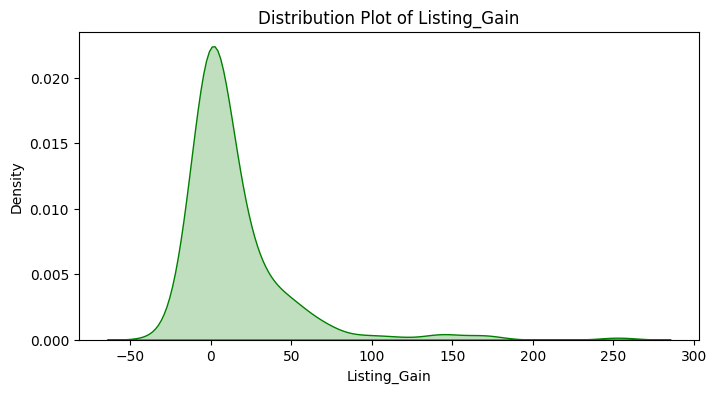

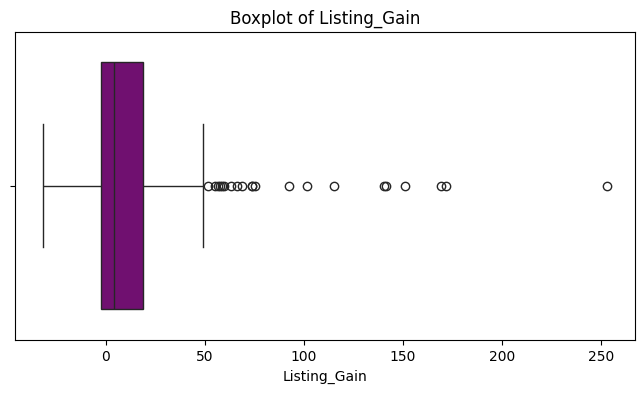

In [ ]:
# Univariate Analysis: Numerical Data
numerical_columns = ['Issue_Price', 'Subscription_Rate', 'Listing_Gain']

# Check if the columns exist in the DataFrame
for col in numerical_columns:
    if col not in ipo_data.columns:
        print(f"Warning: Column '{col}' not found in the DataFrame. Skipping...")
        continue  # Skip to the next column if not found

    # Histogram
    plt.figure(figsize=(8, 4))
    sns.histplot(ipo_data[col], kde=True, color='blue')
    plt.title(f"Histogram of {col}")
    plt.show()

    # Distplot
    plt.figure(figsize=(8, 4))
    sns.kdeplot(ipo_data[col], shade=True, color='green')
    plt.title(f"Distribution Plot of {col}")
    plt.show()

    # Boxplot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=ipo_data[col], color='purple')
    plt.title(f"Boxplot of {col}")
    plt.show()

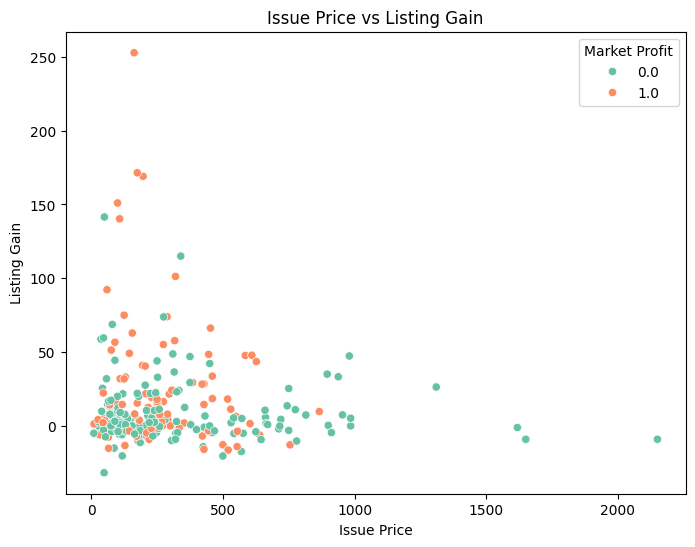

<ipython-input-16-e893ad738ea2>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SME', y='Listing_Gain', data=ipo_data, ci=None, palette='coolwarm')
<ipython-input-16-e893ad738ea2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SME', y='Listing_Gain', data=ipo_data, ci=None, palette='coolwarm')


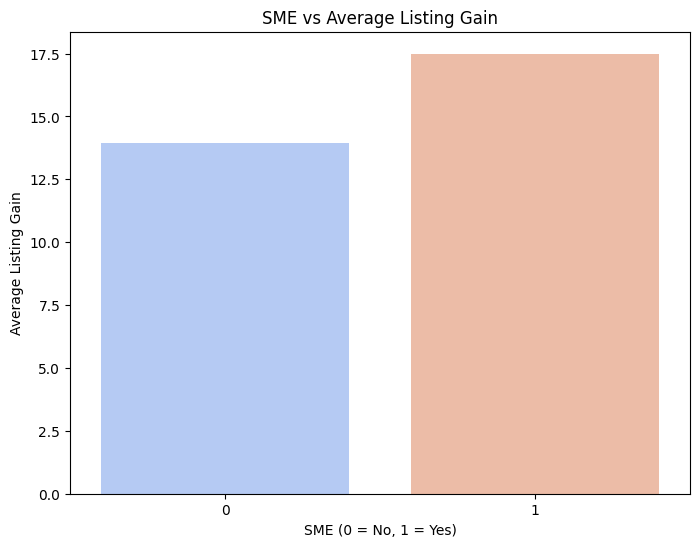

<ipython-input-16-e893ad738ea2>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Market_Profit', y='Listing_Gain', data=ipo_data, palette='pastel')


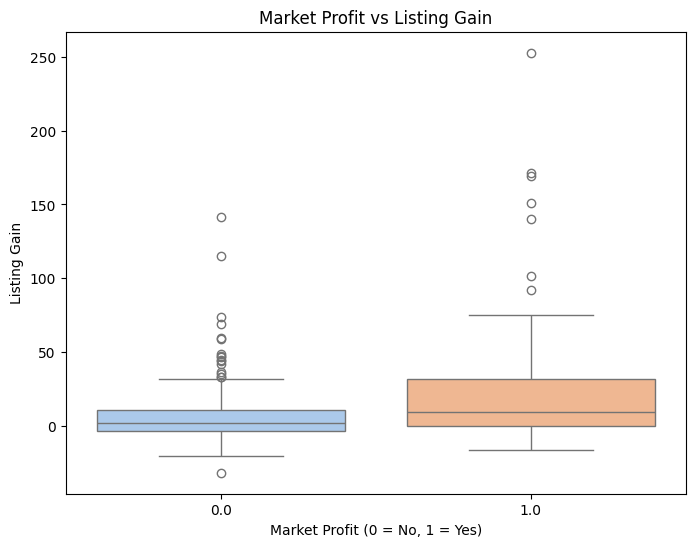

In [ ]:
# Scatter Plot: Issue Price vs Listing Gain
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Issue_price', y='Listing_Gain', hue='Market_Profit', data=ipo_data, palette='Set2')
plt.title("Issue Price vs Listing Gain")
plt.xlabel("Issue Price")
plt.ylabel("Listing Gain")
plt.legend(title="Market Profit")
plt.show()

# Bar Plot: SME vs Listing Gain
plt.figure(figsize=(8, 6))
sns.barplot(x='SME', y='Listing_Gain', data=ipo_data, ci=None, palette='coolwarm')
plt.title("SME vs Average Listing Gain")
plt.xlabel("SME (0 = No, 1 = Yes)")
plt.ylabel("Average Listing Gain")
plt.show()

# Box Plot: Market Profit vs Listing Gain
plt.figure(figsize=(8, 6))
sns.boxplot(x='Market_Profit', y='Listing_Gain', data=ipo_data, palette='pastel')
plt.title("Market Profit vs Listing Gain")
plt.xlabel("Market Profit (0 = No, 1 = Yes)")
plt.ylabel("Listing Gain")
plt.show()


In [ ]:
# Drop unnecessary columns
ipo_data_cleaned = ipo_data.drop(columns=['Date', 'IPO_Name', 'Listing_Gain'])

# Separate features and target variable
X = ipo_data_cleaned.drop(columns=['Pricing_Status'])
y = ipo_data_cleaned['Pricing_Status'].map({'Underpriced': 1, 'Overpriced': 0})

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Checking the effect of scaling
print("Mean of X_train after scaling:", np.mean(X_train_scaled, axis=0))
print("Standard deviation of X_train after scaling:", np.std(X_train_scaled, axis=0))

Mean of X_train after scaling: [-5.25031578e-17  6.12536841e-17 -4.37526315e-17  2.62515789e-17
  1.75010526e-17 -1.75010526e-17  8.75052630e-18 -6.12536841e-17
 -1.18132105e-16 -5.46907894e-17]
Standard deviation of X_train after scaling: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Train Logistic Regression (LR) and Evaluate Performance

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix

# Step 1: Check for missing values
print("Missing values in the dataset:")
print(ipo_data_cleaned.isnull().sum())

# Step 2: Impute missing values in the features (X) using the median strategy
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Step 3: Train Logistic Regression model on the imputed data
lr_model = LogisticRegression()

# Train the model
lr_model.fit(X_train_imputed, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test_imputed)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Print the results
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_lr:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print(conf_matrix)

# Interpretation: If accuracy > 0.5, we can say IPO is underpriced, otherwise overpriced
if accuracy_lr > 0.5:
    print("The IPO is predicted to be underpriced.")
else:
    print("The IPO is predicted to be overpriced.")


Missing values in the dataset:
Issue_Size(crores)    0
QIB                   0
HNI                   0
RII                   0
Issue_price           0
Listing_Open          0
Listing_Close         0
CMP                   0
Market_Profit         1
SME                   0
Pricing_Status        0
dtype: int64
Logistic Regression Model Performance:
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.97      0.98        30

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51

Confusion Matrix:
[[21  0]
 [ 1 29]]
The IPO is predicted to be underpriced.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Steps for K-Nearest Neighbors (KNN):

In [ ]:
# Step 1: Initialize K-Nearest Neighbors model
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors if needed

# Step 2: Train the KNN model
knn_model.fit(X_train_imputed, y_train)

# Step 3: Predict on the test set
y_pred_knn = knn_model.predict(X_test_imputed)

# Step 4: Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print the results
print("\nK-Nearest Neighbors Model Performance:")
print(f"Accuracy: {accuracy_knn:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print(conf_matrix_knn)

# Interpretation: If accuracy > 0.5, we can say IPO is underpriced, otherwise overpriced
if accuracy_knn > 0.5:
    print("The IPO is predicted to be underpriced.")
else:
    print("The IPO is predicted to be overpriced.")



K-Nearest Neighbors Model Performance:
Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.19      0.26        21
           1       0.59      0.80      0.68        30

    accuracy                           0.55        51
   macro avg       0.49      0.50      0.47        51
weighted avg       0.51      0.55      0.50        51

Confusion Matrix:
[[ 4 17]
 [ 6 24]]
The IPO is predicted to be underpriced.


### Steps for Decision Tree Model:

In [ ]:
# Step 1: Initialize Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

# Step 2: Train the Decision Tree model
dt_model.fit(X_train_imputed, y_train)

# Step 3: Predict on the test set
y_pred_dt = dt_model.predict(X_test_imputed)

# Step 4: Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print the results
print("\nDecision Tree Model Performance:")
print(f"Accuracy: {accuracy_dt:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(conf_matrix_dt)

# Interpretation: If accuracy > 0.5, we can say IPO is underpriced, otherwise overpriced
if accuracy_dt > 0.5:
    print("The IPO is predicted to be underpriced.")
else:
    print("The IPO is predicted to be overpriced.")



Decision Tree Model Performance:
Accuracy: 0.63
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.52      0.54        21
           1       0.68      0.70      0.69        30

    accuracy                           0.63        51
   macro avg       0.61      0.61      0.61        51
weighted avg       0.62      0.63      0.63        51

Confusion Matrix:
[[11 10]
 [ 9 21]]
The IPO is predicted to be underpriced.


### Steps for Support Vector Classifier (SVC):

In [ ]:
# Step 1: Initialize Support Vector Classifier
from sklearn.svm import SVC

svc_model = SVC(probability=True)

# Step 2: Train the SVC model
svc_model.fit(X_train_imputed, y_train)

# Step 3: Predict on the test set
y_pred_svc = svc_model.predict(X_test_imputed)

# Step 4: Calculate accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)

# Print the results
print("\nSupport Vector Classifier Model Performance:")
print(f"Accuracy: {accuracy_svc:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))
print("Confusion Matrix:")
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print(conf_matrix_svc)

# Interpretation: If accuracy > 0.5, we can say IPO is underpriced, otherwise overpriced
if accuracy_svc > 0.5:
    print("The IPO is predicted to be underpriced.")
else:
    print("The IPO is predicted to be overpriced.")



Support Vector Classifier Model Performance:
Accuracy: 0.59
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.59      1.00      0.74        30

    accuracy                           0.59        51
   macro avg       0.29      0.50      0.37        51
weighted avg       0.35      0.59      0.44        51

Confusion Matrix:
[[ 0 21]
 [ 0 30]]
The IPO is predicted to be underpriced.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Steps for Random Forest (RF):

In [ ]:
# Step 1: Initialize Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

# Step 2: Train the Random Forest model
rf_model.fit(X_train_imputed, y_train)

# Step 3: Predict on the test set
y_pred_rf = rf_model.predict(X_test_imputed)

# Step 4: Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print the results
print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_rf:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_rf)

# Interpretation: If accuracy > 0.5, we can say IPO is underpriced, otherwise overpriced
if accuracy_rf > 0.5:
    print("The IPO is predicted to be underpriced.")
else:
    print("The IPO is predicted to be overpriced.")



Random Forest Model Performance:
Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.67      0.74        21
           1       0.79      0.90      0.84        30

    accuracy                           0.80        51
   macro avg       0.81      0.78      0.79        51
weighted avg       0.81      0.80      0.80        51

Confusion Matrix:
[[14  7]
 [ 3 27]]
The IPO is predicted to be underpriced.


## Compare the performance of all models:

In [ ]:
# Step 1: Store all model results (accuracy scores)
model_accuracies = {
    "K-Nearest Neighbors": accuracy_knn,
    "Decision Tree": accuracy_dt,
    "Support Vector Classifier": accuracy_svc,
    "Random Forest": accuracy_rf
}

# Step 2: Print out accuracy for all models
print("\nModel Accuracy Comparison:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: Accuracy = {accuracy:.2f}")

# Step 3: Conclusion based on highest accuracy
best_model = max(model_accuracies, key=model_accuracies.get)
print(f"\nBest Performing Model: {best_model} with Accuracy: {model_accuracies[best_model]:.2f}")



Model Accuracy Comparison:
K-Nearest Neighbors: Accuracy = 0.55
Decision Tree: Accuracy = 0.63
Support Vector Classifier: Accuracy = 0.59
Random Forest: Accuracy = 0.80

Best Performing Model: Random Forest with Accuracy: 0.80


### Prediction by taking Input from User

In [ ]:
import numpy as np

# Sample input for a new IPO (you can change these values as per the new IPO data)
new_ipo_data = {
    'Issue_Size(crores)': 500,         # Example: 500 crores
    'QIB': 35,                         # Example: 35%
    'HNI': 25,                         # Example: 25%
    'RII': 40,                         # Example: 40%
    'Issue_price': 120,                # Example: 120 INR
    'Listing_Open': 125,               # Example: 125 INR
    'Listing_Close': 130,              # Example: 130 INR
    'CMP': 140,                        # Example: 140 INR
    'Market_Profit': 1,                # Example: 1 (Yes)
    'SME': 0                           # Example: 0 (No)
}

# Convert the input data into a DataFrame (matching the feature columns)
new_ipo_df = pd.DataFrame([new_ipo_data])

# Apply any preprocessing steps: encoding, scaling
# Encoding categorical variables (Market_Profit and SME)
new_ipo_df['Market_Profit'] = new_ipo_df['Market_Profit'].map({'Yes': 1, 'No': 0})
new_ipo_df['SME'] = new_ipo_df['SME'].map({'Yes': 1, 'No': 0})

# Feature scaling (using the same scaler from the training data)
new_ipo_scaled = scaler.transform(new_ipo_df)

# Make prediction using the best model (replace 'rf_model' with your best performing model)
new_ipo_prediction = rf_model.predict(new_ipo_scaled)

# Output the result: whether the IPO is predicted to be underpriced (1) or overpriced (0)
if new_ipo_prediction[0] == 1:
    print("The IPO is predicted to be underpriced.")
else:
    print("The IPO is predicted to be overpriced.")


The IPO is predicted to be underpriced.
